In [32]:
import torch
from torch.autograd import Variable
import torch.nn.functional as func


# 数据清洗包
import pandas as pd
import numpy as np
import random as rad

# 数据可视化
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 机器学习算法
"""
scikit-learn，又写作sklearn，是一个开源的基于python语言的机器学习工具包。它通过NumPy, SciPy和Matplotlib等python数值计算的库实现高效的算法应用，并且涵盖了几乎所有主流机器学习算法。
sklearn中常用的模块有分类、回归、聚类、降维、模型选择、预处理。

分类：识别某个对象属于哪个类别，常用的算法有：SVM（支持向量机）、nearest neighbors（最近邻）、random forest（随机森林），常见的应用有：垃圾邮件识别、图像识别。

回归：预测与对象相关联的连续值属性，常见的算法有：SVR（支持向量机）、 ridge regression（岭回归）、Lasso，常见的应用有：药物反应，预测股价。

聚类：将相似对象自动分组，常用的算法有：k-Means、 spectral clustering、mean-shift，常见的应用有：客户细分，分组实验结果。

降维：减少要考虑的随机变量的数量，常见的算法有：PCA（主成分分析）、feature selection（特征选择）、non-negative matrix factorization（非负矩阵分解），常见的应用有：可视化，提高效率。

模型选择：比较，验证，选择参数和模型，常用的模块有：grid search（网格搜索）、cross validation（交叉验证）、 metrics（度量）。它的目标是通过参数调整提高精度。

预处理：特征提取和归一化，常用的模块有：preprocessing，feature extraction，常见的应用有：把输入数据（如文本）转换为机器学习算法可用的数据。"""
import sklearn
# TODO 逻辑回归 感知机 随机梯度下降法 (liner_model)
# TODO (线性)支持向量机 (svm)
# TODO 最近邻 (neighbors)
# TODO 贝叶斯(bayes)
# TODO 决策树(tree)
# TODO 随机森林(ensemble)

题目:要求使用data(name,age,性别阶层),建立预测模型,什么人更可能生存

***数据***
有一个训练集和一个测试集
train.csv(891人既定事实)和test.csv(类似)
___
Passenger：乘客编号
Survived：相当于label 是否幸存,1 = 幸存 0 = 未幸存
Pclass：乘客所在船舱等级，跟一等座二等座商务座类似。
Name：乘客名，(话说乘客获救与否和名字有啥关系，可能只是想完善数据集？)
Sex：性别
Age：年龄
SibSp：兄弟姐妹的数量
Parh：父母子女的数量
Ticket：乘客购买的船票编号
Fare：船票价
Cabin：客舱号
Embarked：上船地点(S=英国南安普顿，C=法国瑟堡，Q=爱尔兰昆士敦)


**加载数据集**

In [33]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
display(train.head(n=1),test.head(n=1))
print("______________________")
display(train.tail(n=1),test.tail(n=1))
combine = [train,test]
# 便于后续一起处理

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


______________________


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


余下流程:
数据整理与清洗
分析模式,特征处理
建模 预测 解决问题
提交结果

notice:
Q:预测是否幸存
i:既定事实中存活率32%
ii:没有足够的救生艇
iii:运气之外,有些人更有可能活下来

**统计分析**

In [34]:
# 获取特征名
print(train.columns.values)
list_output=['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
             'Ticket' 'Fare' 'Cabin' 'Embarked']

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [35]:
# 查询数据缺失
print(train.isnull().sum())
print("|"*36)
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
||||||||||||||||||||||||||||||||||||
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [36]:
# 预览基本信息

train.info()
print("|"*36)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
||||||||||||||||||||||||||||||||||||
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  

In [37]:
# 数值特征
round(train.describe(percentiles=[.5,.6,.7,.75,.8,.9,.99]),2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
60%,535.00,0.00,3.00,31.80,0.00,0.00,21.68
70%,624.00,1.00,3.00,36.00,1.00,0.00,27.00
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
80%,713.00,1.00,3.00,41.00,1.00,1.00,39.69
90%,802.00,1.00,3.00,50.00,1.00,2.00,77.96


1. survive38% only 0 or 1
2. 多于50%是三等票
3. 65-80高龄乘客较少<1%
4. 票价差异大 most 512＄<1%

In [38]:
# 分类特征
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


5. 名字唯一
6. 男性65%
7. 票号22%重复
8. 客舱号也是,存在共用情况
9. 大多数人从s口来

**基于分析的假设:**
便于后期建模
. age相关与幸存
. 登船口与某些相关特征相关
. 票号和客舱号高度不完整或不相关 剔除
. 名字和乘客编号显然无用,但名字或许可提取sth


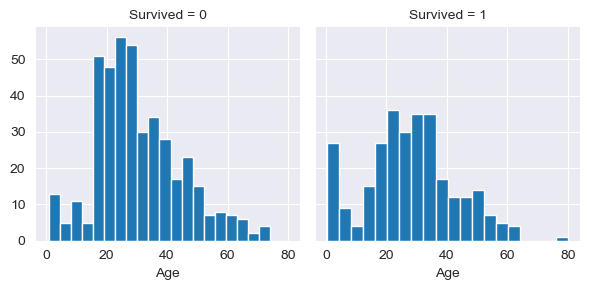

In [39]:
# #去除'age'中的缺失值，dist plot不能处理缺失数据
# age1 = titanic['age'].dropna()

g=sns.FacetGrid(train,col='Survived')
g.map(plt.hist,'Age',bins=20)

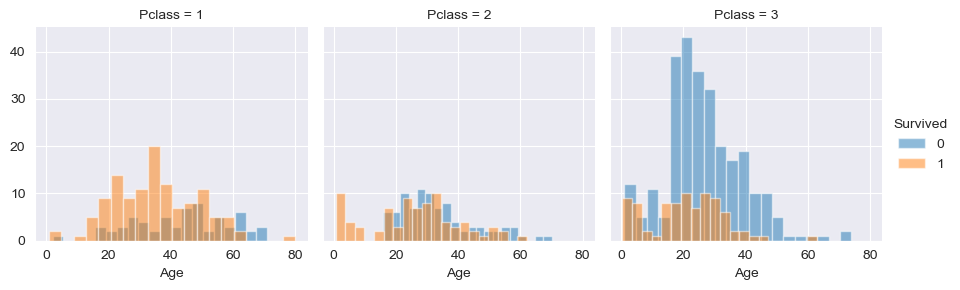

In [40]:
gid=sns.FacetGrid(train,col='Pclass',hue='Survived')
gid.map(plt.hist,'Age',alpha=0.5,bins=20)
gid.add_legend()

.
  warnings.warn(warning)


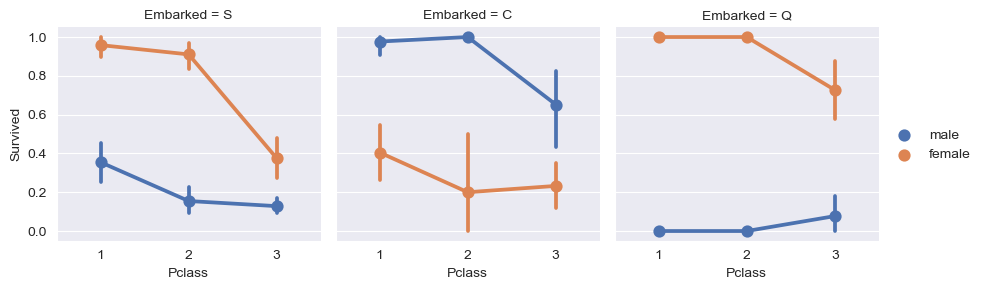

In [41]:
gid=sns.FacetGrid(train,col='Embarked')
gid.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep')
gid.add_legend()#点图函数

.
  warnings.warn(warning)


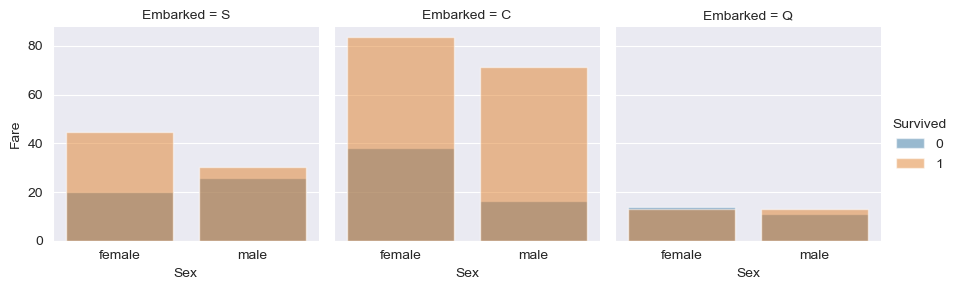

In [42]:
gid=sns.FacetGrid(train,col='Embarked',hue='Survived')
gid.map(sns.barplot,'Sex','Fare',alpha=.5,errorbar=None)
gid.add_legend()

**整理清洗data**


In [43]:
# 删除ticket和cabin
train=train.drop(['Ticket','Cabin'],axis=1)
test=test.drop(['Ticket','Cabin'],axis=1)
combine=[train,test]
"after",train.shape,test.shape,combine[0].shape,combine[1].shape

('after', (891, 10), (418, 9), (891, 10), (418, 9))

In [44]:
for dataset in combine:
    dataset['Title']=dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
# pd.crosstab 列联表
pd.crosstab(train['Title'],train['Sex']).sort_values(by='female',ascending=False)

Sex,female,male
Title,,
Miss,182,0
Mrs,125,0
Mlle,2,0
Mme,1,0
Countess,1,0
Dr,1,6
Ms,1,0
Lady,1,0
Capt,0,1


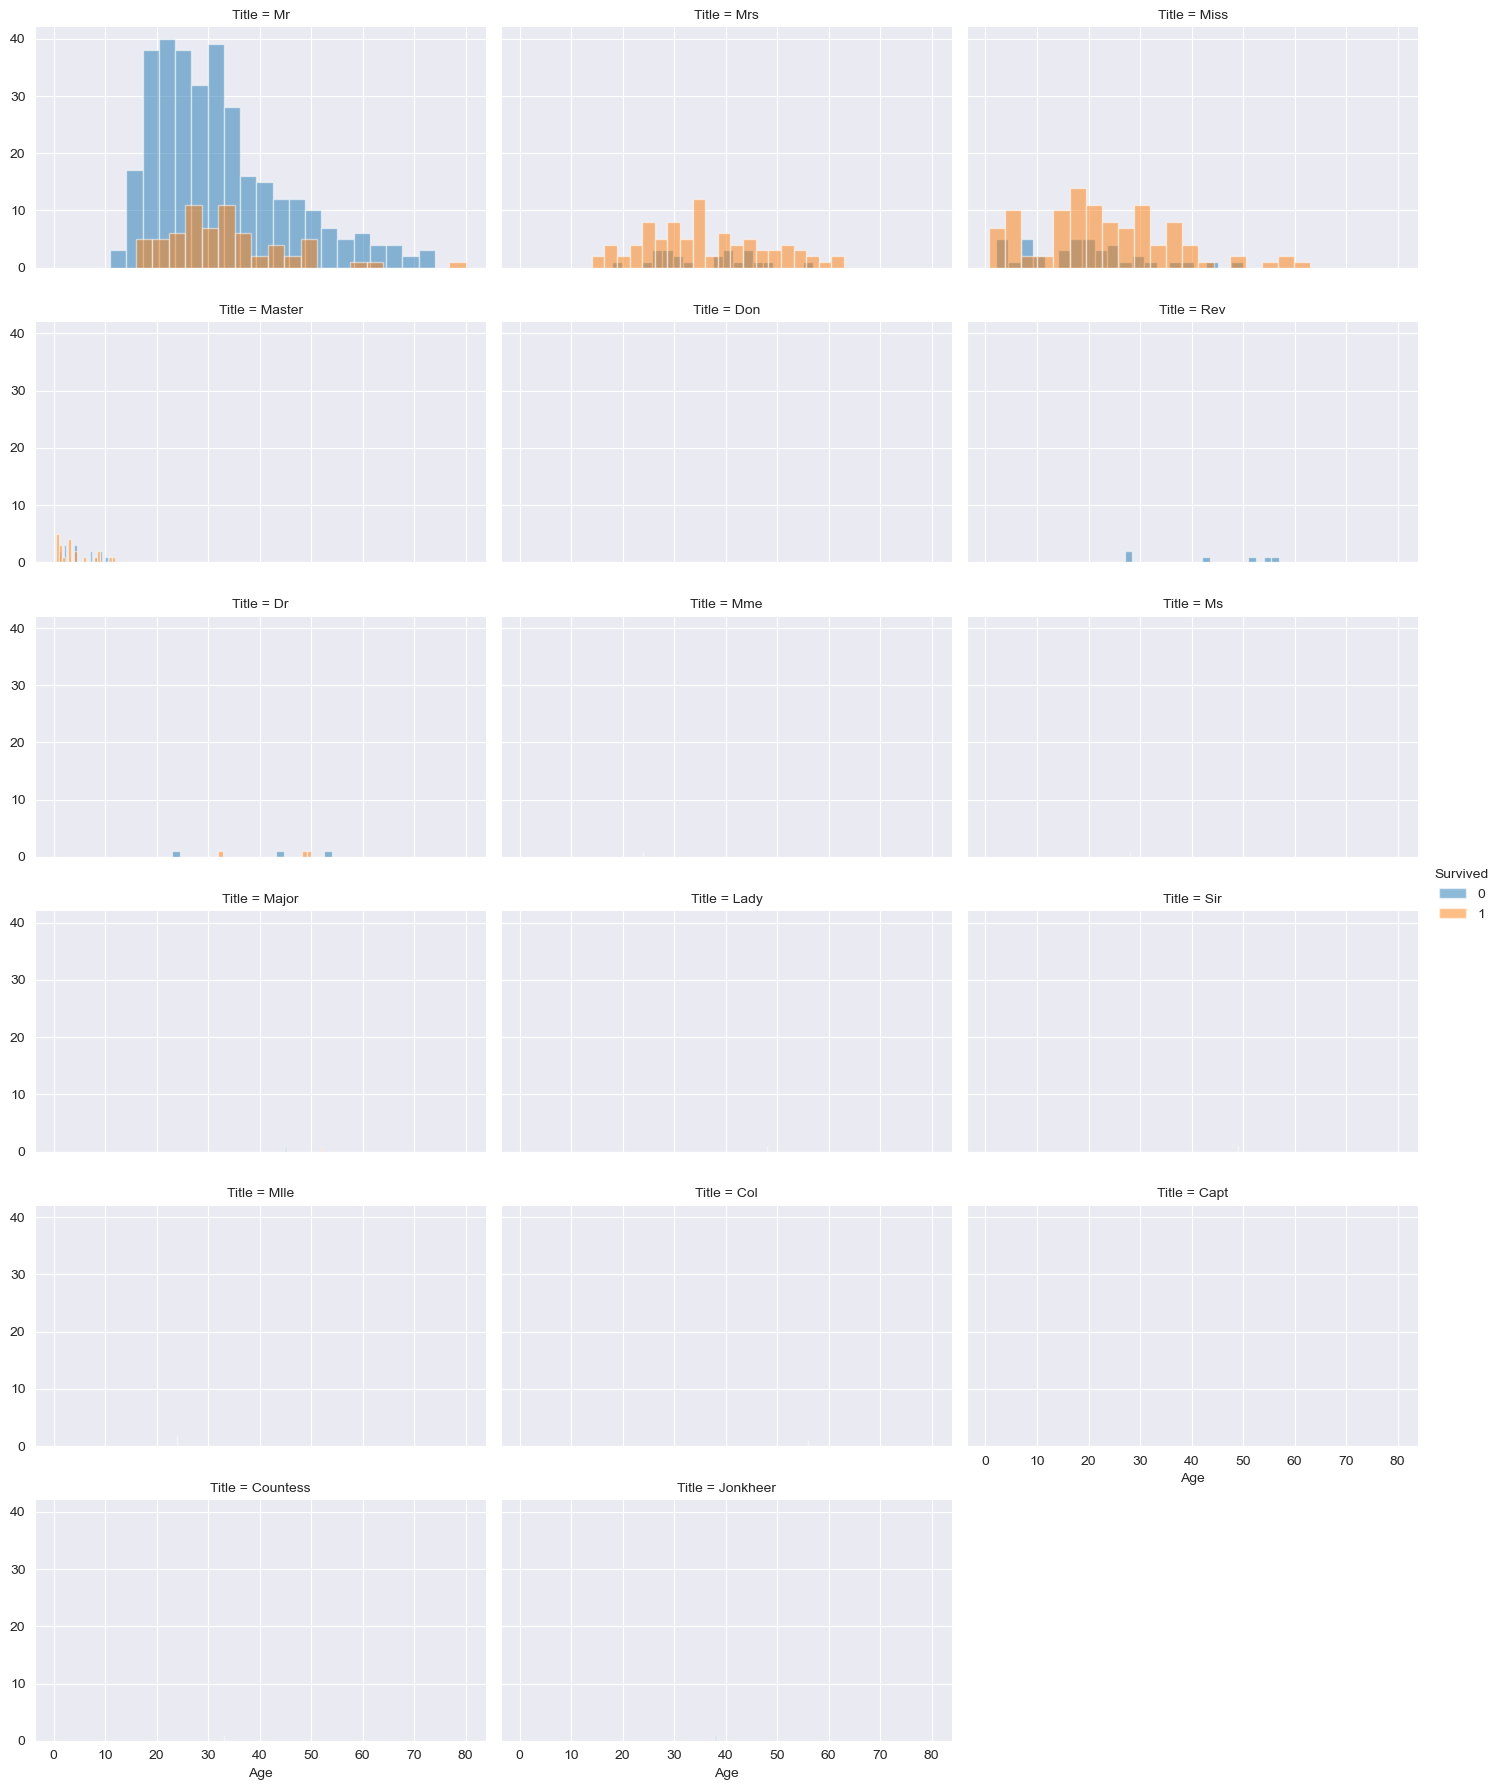

In [45]:

gid=sns.FacetGrid(train, col='Title', hue='Survived', col_wrap=3, aspect=1.6)
gid.map(plt.hist,'Age',alpha=0.5,bins=20)
gid.add_legend()

In [46]:
# 归并稀有头衔
for dataset in combine:
    dataset['Title']=dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
    dataset['Title']=dataset['Title'].replace(['Mlle','Ms'],'Miss')
    dataset['Title']=dataset['Title'].replace('Mme','Mrs')
train[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [47]:
# title 序列化
title_map={"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Rare":5}
for dataset in combine:# 返回值合并,迭代器
    dataset['Title']=dataset['Title'].map(title_map)
    dataset['Title']=dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [48]:
# 现在可以删除name和pasengerld特征
train=train.drop(['Name','PassengerId'],axis=1)
test=test.drop(['Name'],axis=1)
combine=[train,test]
train.shape,test.shape

((891, 9), (418, 9))

In [49]:
# 转换sex
for dataset in combine:# 返回值合并,迭代器
    dataset['Sex']=dataset['Sex'].map({'female':1,'male':0}).astype(int)
train.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [50]:
# 填补年龄

guess_age=np.zeros((2,3))
# sex && pclass 2*3 的组合预测值

for dataset in combine:
    # 计算每一个分组的预测
    for i in range(0,2):
        for j in range(0,3):
            guess=dataset[(dataset['Sex']==i)&(dataset['Pclass']==j+1)]['Age'].dropna()

            age_guess=guess.median()

            guess_age[i,j]=int(age_guess/0.5+0.5)*0.5

    # 对空值赋值
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull())&(dataset.Sex==i)&(dataset.Pclass==j+1),'Age']=guess_age[i,j]

    dataset['Age']=dataset['Age'].astype(int)

train.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [51]:
# 把年龄特征离散化,稳定模型,防过拟合

train['AgeBand']=pd.cut(train['Age'],5) # 五等份

train[['AgeBand','Survived']].groupby(['AgeBand'],as_index=False).mean().sort_values(by='AgeBand',ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [52]:
# 年龄段 序数化
for dataset in combine:
    dataset.loc[dataset['Age']<=16,'Age']=0
    dataset.loc[(dataset['Age']>16)&(dataset['Age']<=32),'Age']=1
    dataset.loc[(dataset['Age']>32)&(dataset['Age']<=48),'Age']=2
    dataset.loc[(dataset['Age']>48)&(dataset['Age']<=64),'Age']=3
    dataset.loc[dataset['Age']>64,'Age']=4
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [53]:
# 清洗
train=train.drop(['AgeBand'],axis=1)
combine = [train,test]
train.head()
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,2,0,0,7.8292,Q,1
1,893,3,1,2,1,0,7.0000,S,3
2,894,2,0,3,0,0,9.6875,Q,1
3,895,3,0,1,0,0,8.6625,S,1
4,896,3,1,1,1,1,12.2875,S,3
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,1,0,0,8.0500,S,1
414,1306,1,1,2,0,0,108.9000,C,5
415,1307,3,0,2,0,0,7.2500,S,1
416,1308,3,0,1,0,0,8.0500,S,1


In [54]:
# 建立family特征
for dataset in combine:
    dataset['FamilySize']=dataset['SibSp']+dataset['Parch']+1

train[['FamilySize','Survived']].groupby(['FamilySize'],as_index=False).mean().sort_values(by='Survived',ascending=False)


,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [55]:
# 创建孤人特征
for dataset in combine:
    dataset['IsAlone']=0
    dataset.loc[dataset['FamilySize']==1,'IsAlone']=1
train[['IsAlone','Survived']].groupby(['IsAlone'],as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [56]:
# 交互
for dataset in combine:
    dataset['Age*P']=dataset.Age*dataset.Pclass

train.loc[:,['Age*P','Age','Pclass']].head(10)
train[['Age*P','Survived']].groupby(['Age*P'],as_index=False).mean()

,Age*P,Survived
0,0,0.550000
1,1,0.728814
2,2,0.520408
3,3,0.277487
4,4,0.415094
5,6,0.149425
6,8,0.000000
7,9,0.111111
8,12,0.000000


In [57]:
# 填补 embark(众数)

freq=train.Embarked.dropna().mode()[0]
for dataset in combine:
    dataset['Embarked']=dataset['Embarked'].fillna(freq)

train[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [58]:
for dataset in combine:
    dataset['Embarked']=dataset['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Age*P
0,0,3,0,1,1,0,7.2500,0,1,2,0,3
1,1,1,1,2,1,0,71.2833,1,3,2,0,2
2,1,3,1,1,0,0,7.9250,0,2,1,1,3
3,1,1,1,2,1,0,53.1000,0,3,2,0,2
4,0,3,0,2,0,0,8.0500,0,1,1,1,6


In [59]:
# 票价 中位数填补
test['Fare'].fillna(test['Fare'].dropna().median(),inplace=True)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Age*P
0,892,3,0,2,0,0,7.8292,2,1,1,1,6
1,893,3,1,2,1,0,7.0000,0,3,2,0,6
2,894,2,0,3,0,0,9.6875,2,1,1,1,6
3,895,3,0,1,0,0,8.6625,0,1,1,1,3
4,896,3,1,1,1,1,12.2875,0,3,3,0,3


(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

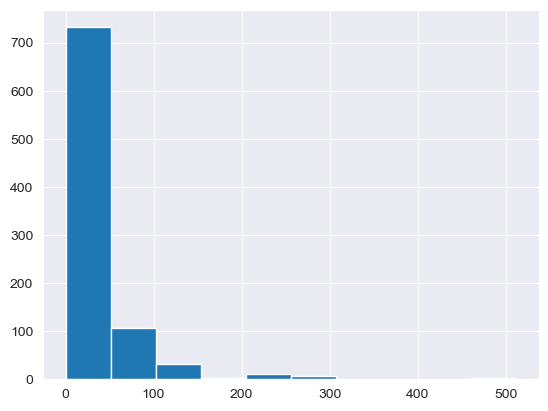

In [60]:
plt.hist(train['Fare'])

In [62]:
# 数据集中右侧,根据样本分位数,等频分
train['FareBand']=pd.qcut(train['Fare'],4)
train[['FareBand','Survived']].groupby(['FareBand'],as_index=False).mean().sort_values(by='FareBand',ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [63]:
for dataset in combine:
    dataset.loc[dataset['Fare']<=7.91,'Fare']=0
    dataset.loc[(dataset['Fare']>7.91)&(dataset['Fare']<=14.454),'Fare']=1
    dataset.loc[(dataset['Fare']>14.454)&(dataset['Fare']<=31),'Fare']=2
    dataset.loc[dataset['Fare']>31,'Fare']=3
    dataset['Fare']=dataset['Fare'].astype(int)

train=train.drop(['FareBand'],axis=1)
combine=[train,test]
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Age*P
0,0,3,0,1,1,0,0,0,1,2,0,3
1,1,1,1,2,1,0,3,1,3,2,0,2
2,1,3,1,1,0,0,1,0,2,1,1,3
3,1,1,1,2,1,0,3,0,3,2,0,2
4,0,3,0,2,0,0,1,0,1,1,1,6
5,0,3,0,1,0,0,1,2,1,1,1,3
6,0,1,0,3,0,0,3,0,1,1,1,3
7,0,3,0,0,3,1,2,0,4,5,0,0
8,1,3,1,1,0,2,1,0,3,3,0,3
9,1,2,1,0,1,0,2,1,3,2,0,0


**建模**

建立输出与其它变量的关系,属于分类回归问题
使用给定训练集训练,我们称之为监督式机器学习

In [64]:
X_train=train.drop('Survived',axis=1)
Y_train=train['Survived']
X_test=test.drop('PassengerId',axis=1).copy()
X_test.shape,X_train.shape,Y_train.shape

((418, 11), (891, 11), (891,))

In [65]:
from sklearn.ensemble import RandomForestClassifier
# 随机森林
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,Y_train)
Y_predict=random_forest.predict(X_test)
random_forest.score(X_train,Y_train)
acc_random=round(random_forest.score(X_train,Y_train)*100,2)
acc_random

89.0

In [66]:
sub_m=pd.DataFrame({'PassengerID':test['PassengerId'],'Survived':Y_predict})
sub_m.to_csv('./submission.csv',index=False)